# All Filter Methods on Iris Dataset

In [12]:
#import paskages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.datasets import load_iris

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import f_classif,chi2

ERROR! Session/line number was not unique in database. History logging moved to new session 3357


In [13]:
%matplotlib inline  


### Data Exploration

In [14]:
# Load Iris dataset
iris=load_iris()

In [15]:
#features a a dataframe
X=pd.DataFrame(iris.data , columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
# Target as Series
y=pd.Series(iris.target , name='Target')
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int32

In [17]:
# Summary statistics of features
print("Feature Summary Statistics:")
X.describe()

Feature Summary Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
ProfileReport(X)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Linear Discriminant Analysis (LDA)

In [19]:
# Apply Linear Discriminant Analysis
lda=LinearDiscriminantAnalysis(n_components=2)# Reduce to 2 dimensions

In [20]:
# fit_transform 
X_lda=lda.fit_transform(X,y)

In [21]:
# Create a DataFrame for visualization
lda_df =pd.DataFrame(X_lda , columns=["Feature_1",'Feature_2'])
lda_df["Target"] = y


In [22]:
#show new lda_df
lda_df.head()

,Feature_1,Feature_2,Target
0,8.061800,-0.300421,0
1,7.128688,0.786660,0
2,7.489828,0.265384,0
3,6.813201,0.670631,0
4,8.132309,-0.514463,0


In [40]:
x="Feature_1"
y="Feature_1"

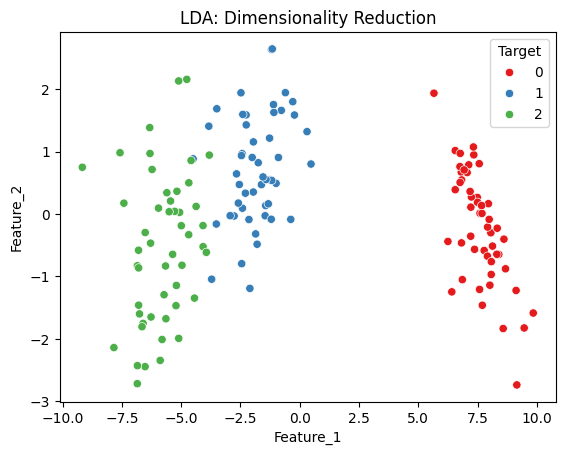

In [23]:
# Plot the LDA results
sns.scatterplot(data=lda_df, x="Feature_1", y="Feature_2", hue="Target", palette="Set1")
plt.title("LDA: Dimensionality Reduction")
plt.show()


### ANOVA (Analysis of Variance)

In [27]:
# Apply ANOVA F-test
f_scores,p_values = f_classif(X,y)

In [28]:
# Combine results into a DataFrame
anova_results =pd.DataFrame({
    "Feature":X.columns,
    "F-Score":f_scores , 
    "P-Values":p_values
}).sort_values(by="F-Score", ascending=False)

In [29]:
anova_results

,Feature,F-Score,P-Values
2,petal length (cm),1180.161182,2.856777e-91
3,petal width (cm),960.007147,4.169446e-85
0,sepal length (cm),119.264502,1.669669e-31
1,sepal width (cm),49.160040,4.492017e-17


C:\Users\DELL\AppData\Local\Temp\ipykernel_3872\1923868628.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=anova_results, x="F-Score", y="Feature", palette="viridis")


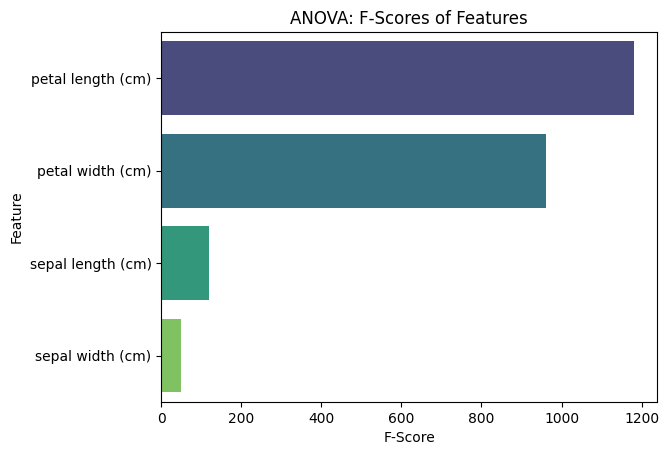

In [30]:
# Visualize ANOVA results
sns.barplot(data=anova_results, x="F-Score", y="Feature", palette="viridis")
plt.title("ANOVA: F-Scores of Features")
plt.show()

### Chi-Square Test

In [31]:
# Ensure non-negative values for Chi-Square test
X_non_neg = np.abs(X)

In [32]:
# Apply Chi-Square Test
chi_scores, chi_p_values = chi2(X_non_neg, y)

In [33]:
# Combine results into a DataFrame
chi2_results = pd.DataFrame({
    "Feature": X.columns,
    "Chi-Square Score": chi_scores,
    "P-Value": chi_p_values
}).sort_values(by="Chi-Square Score", ascending=False)


In [34]:
chi2_results

,Feature,Chi-Square Score,P-Value
2,petal length (cm),116.312613,5.533972e-26
3,petal width (cm),67.048360,2.758250e-15
0,sepal length (cm),10.817821,4.476515e-03
1,sepal width (cm),3.710728,1.563960e-01


C:\Users\DELL\AppData\Local\Temp\ipykernel_3872\888093621.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chi2_results, x="Chi-Square Score", y="Feature", palette="coolwarm")


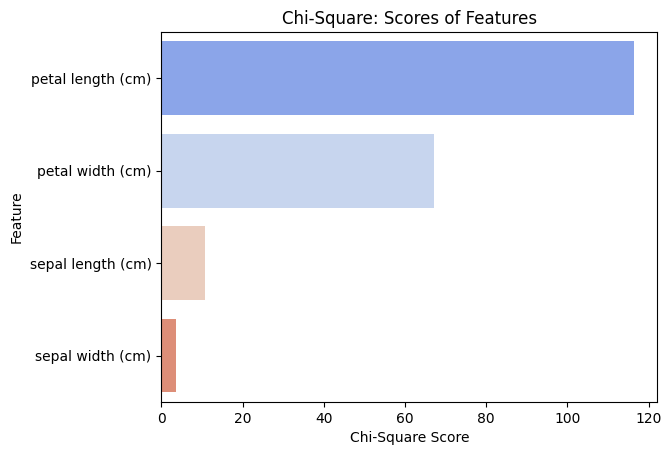

In [35]:
# Visualize Chi-Square results
sns.barplot(data=chi2_results, x="Chi-Square Score", y="Feature", palette="coolwarm")
plt.title("Chi-Square: Scores of Features")
plt.show()

In [36]:
# Combine all results into a single DataFrame
summary = pd.DataFrame({
    "Feature": X.columns,
    "F-Score (ANOVA)": f_scores,
    "P-Value (ANOVA)": p_values,
    "Chi-Square Score": chi_scores,
    "P-Value (Chi-Square)": chi_p_values
}).sort_values(by="F-Score (ANOVA)", ascending=False)



In [37]:
print("\nFeature Selection Summary:\n",)
summary


Feature Selection Summary:



,Feature,F-Score (ANOVA),P-Value (ANOVA),Chi-Square Score,P-Value (Chi-Square)
2,petal length (cm),1180.161182,2.856777e-91,116.312613,5.533972e-26
3,petal width (cm),960.007147,4.169446e-85,67.048360,2.758250e-15
0,sepal length (cm),119.264502,1.669669e-31,10.817821,4.476515e-03
1,sepal width (cm),49.160040,4.492017e-17,3.710728,1.563960e-01
